# **Leveraging Unsupervised Clustering of Wind Patterns to Enhance Urban Sustainability in Smart Cities**

## Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Load Dataset

In [2]:
#df = pd.read_csv('weather.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Classroom/BMCS2114 (Machine Learning) 202501 (Lecture)/ML Assignment/minute_weather.csv')

Mounted at /content/drive


## Explore Dataset

In [4]:
# Print the first five rows of the DataFrame.
print(df.head())

   rowID     hpwren_timestamp  air_pressure  air_temp  avg_wind_direction  \
0      0  2011-09-10 00:00:49         912.3     64.76                97.0   
1      1  2011-09-10 00:01:49         912.3     63.86               161.0   
2      2  2011-09-10 00:02:49         912.3     64.22                77.0   
3      3  2011-09-10 00:03:49         912.3     64.40                89.0   
4      4  2011-09-10 00:04:49         912.3     64.40               185.0   

   avg_wind_speed  max_wind_direction  max_wind_speed  min_wind_direction  \
0             1.2               106.0             1.6                85.0   
1             0.8               215.0             1.5                43.0   
2             0.7               143.0             1.2               324.0   
3             1.2               112.0             1.6                12.0   
4             0.4               260.0             1.0               100.0   

   min_wind_speed  rain_accumulation  rain_duration  relative_humidity  
0

In [5]:
# Print the shape of the DataFrame.
print(df.shape)

(1587257, 13)


In [6]:
# Print the column names of the DataFrame.
print(df.columns)

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')


In [7]:
# Print the data types of each column.
print(df.dtypes)

rowID                   int64
hpwren_timestamp       object
air_pressure          float64
air_temp              float64
avg_wind_direction    float64
avg_wind_speed        float64
max_wind_direction    float64
max_wind_speed        float64
min_wind_direction    float64
min_wind_speed        float64
rain_accumulation     float64
rain_duration         float64
relative_humidity     float64
dtype: object


In [8]:
# Print the summary statistics of the DataFrame.
print(df.describe())

              rowID  air_pressure      air_temp  avg_wind_direction  \
count  1.587257e+06  1.587257e+06  1.587257e+06        1.586824e+06   
mean   7.936280e+05  9.168301e+02  6.185144e+01        1.619654e+02   
std    4.582018e+05  3.051593e+00  1.183362e+01        9.520812e+01   
min    0.000000e+00  9.050000e+02  3.164000e+01        0.000000e+00   
25%    3.968140e+05  9.148000e+02  5.270000e+01        6.200000e+01   
50%    7.936280e+05  9.167000e+02  6.224000e+01        1.820000e+02   
75%    1.190442e+06  9.187000e+02  7.088000e+01        2.170000e+02   
max    1.587256e+06  9.295000e+02  9.950000e+01        3.590000e+02   

       avg_wind_speed  max_wind_direction  max_wind_speed  min_wind_direction  \
count    1.586824e+06        1.586824e+06    1.586824e+06        1.586824e+06   
mean     2.774272e+00        1.634030e+02    3.399813e+00        1.668264e+02   
std      2.060758e+00        9.236723e+01    2.423167e+00        9.746275e+01   
min      0.000000e+00        0.00000

## Data Preprocessing

### Feature Engineering

In [9]:
# Clean column names by stripping spaces
df.columns = df.columns.str.strip()

#Timestamp processing
df['hpwren_timestamp'] = pd.to_datetime(df['hpwren_timestamp'])

# Extract useful fe from the timestamp
df['year'] = df['hpwren_timestamp'].dt.year
df['month'] = df['hpwren_timestamp'].dt.month
df['day'] = df['hpwren_timestamp'].dt.day
df['hour'] = df['hpwren_timestamp'].dt.hour
df['minute'] = df['hpwren_timestamp'].dt.minute
df['second'] = df['hpwren_timestamp'].dt.second
df['timestamp'] = pd.to_datetime(df['hpwren_timestamp']).dt.time
df.rename(columns={'hpwren_timestamp': 'full_timestamp'}, inplace=True)
df.head()


rowID      full_timestamp  air_pressure  air_temp  avg_wind_direction  \
0      0 2011-09-10 00:00:49         912.3     64.76                97.0   
1      1 2011-09-10 00:01:49         912.3     63.86               161.0   
2      2 2011-09-10 00:02:49         912.3     64.22                77.0   
3      3 2011-09-10 00:03:49         912.3     64.40                89.0   
4      4 2011-09-10 00:04:49         912.3     64.40               185.0   

   avg_wind_speed  max_wind_direction  max_wind_speed  min_wind_direction  \
0             1.2               106.0             1.6                85.0   
1             0.8               215.0             1.5                43.0   
2             0.7               143.0             1.2               324.0   
3             1.2               112.0             1.6                12.0   
4             0.4               260.0             1.0               100.0   

   min_wind_speed  rain_accumulation  rain_duration  relative_humidity  year  \
0             1.0                NaN            NaN               60.5  2011   
1             0.2                0.0            0.0               39.9  2011   
2             0.3                0.0            0.0               43.0  2011   
3             0.7                0.0            0.0               49.5  2011   
4             0.1                0.0            0.0               58.8  2011   

   month  day  hour  minute  second timestamp  
0      9   10     0       0      49  00:00:49  
1      9   10     0       1      49  00:01:49  
2      9   10     0       2      49  00:02:49  
3      9   10     0       3      49  00:03:49  
4      9   10     0       4      49  00:04:49

### Missing Values

In [10]:
# Check for missing values
missing_values = df.isnull().sum()

# Display cleaned column names, missing values
df.columns, missing_values

(Index(['rowID', 'full_timestamp', 'air_pressure', 'air_temp',
        'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
        'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
        'rain_accumulation', 'rain_duration', 'relative_humidity', 'year',
        'month', 'day', 'hour', 'minute', 'second', 'timestamp'],
       dtype='object'),
 rowID                   0
 full_timestamp          0
 air_pressure            0
 air_temp                0
 avg_wind_direction    433
 avg_wind_speed        433
 max_wind_direction    433
 max_wind_speed        433
 min_wind_direction    433
 min_wind_speed        433
 rain_accumulation       1
 rain_duration           1
 relative_humidity       0
 year                    0
 month                   0
 day                     0
 hour                    0
 minute                  0
 second                  0
 timestamp               0
 dtype: int64)

In [11]:
# Drop all rows with any missing values in the DataFrame
print("Before drop:", df.shape)
df = df.dropna()
print("After drop:", df.shape)

Before drop: (1587257, 20)
After drop: (1586823, 20)


### Duplicates rows

In [12]:
# Check for duplicate rows
duplicated_rows = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicated_rows}")

Number of duplicated rows: 0


### Invalid Values

In [13]:
print(df['rain_accumulation'].value_counts())


rain_accumulation
0.00      1577452
0.01         3448
0.02         1329
0.03          726
0.04          437
           ...   
0.84            1
560.90          1
0.88            1
640.15          1
655.01          1
Name: count, Length: 120, dtype: int64


In [14]:
df['rain_accumulation'] = df['rain_duration'].apply(lambda x: 1 if x != 0 else 0)
print(df['rain_accumulation'].value_counts())
print(df['rain_duration'].value_counts())

rain_accumulation
0    1571710
1      15113
Name: count, dtype: int64
rain_duration
0.0        1571710
60.0          6584
10.0          2775
50.0          1758
20.0          1409
40.0          1340
30.0          1233
59.0             3
49.0             3
39.0             2
34871.0          1
31377.0          1
2960.0           1
31701.0          1
56555.0          1
63305.0          1
Name: count, dtype: int64


### Outliers

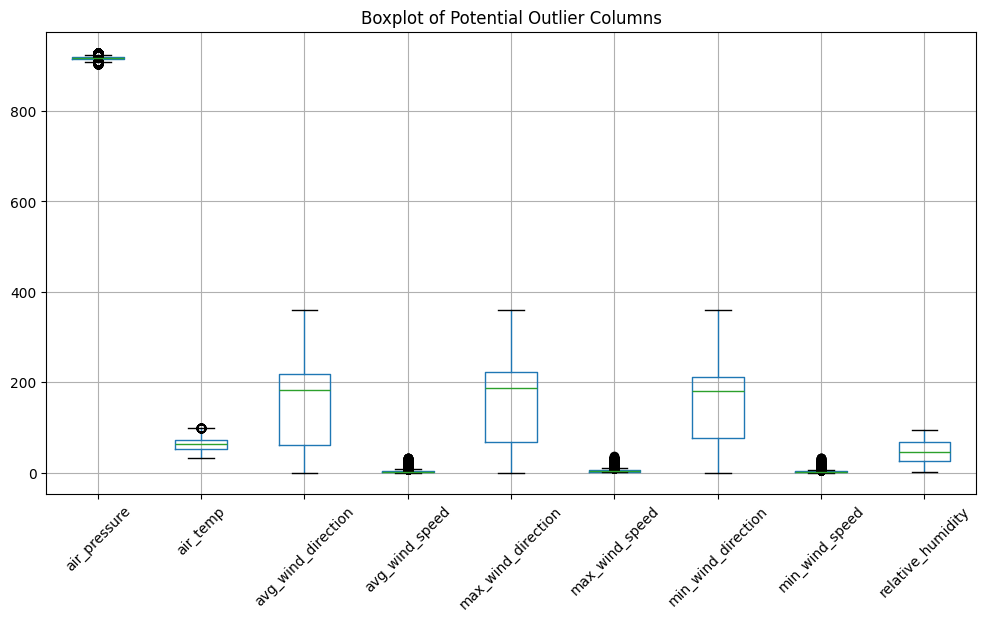

In [15]:
outlier_cols = [
    'air_pressure', 'air_temp',
    'avg_wind_direction', 'avg_wind_speed',
    'max_wind_direction', 'max_wind_speed',
    'min_wind_direction', 'min_wind_speed',
    'relative_humidity'
]
plt.figure(figsize=(12, 6))
df[[col for col in outlier_cols if col != 'rain_duration']].boxplot(rot=45)
plt.title("Boxplot of Potential Outlier Columns")
plt.show()

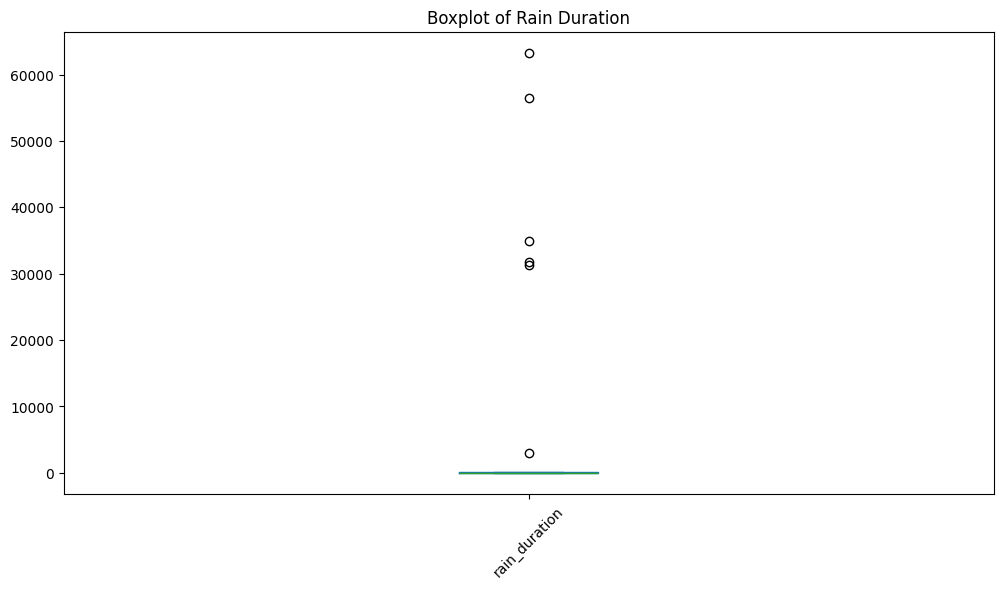

In [16]:
non0_rain = df.loc[df['rain_duration'] != 0, 'rain_duration']
plt.figure(figsize=(12, 6))
non0_rain.plot.box(rot=45)
plt.title("Boxplot of Rain Duration")
plt.show()

In [17]:
# 1. Outlier detection for general columns using IQR
Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers for each column in outlier_cols
outliers_count = ((df[outlier_cols] < lower_bound) | (df[outlier_cols] > upper_bound)).sum()
print("Outliers count for general columns:\n", outliers_count)

# 2. Outlier detection for rain_duration using z-score (for nonzero values only)
non0_rain = df.loc[df['rain_duration'] != 0, 'rain_duration']
z_scores = stats.zscore(non0_rain)
threshold = 3
non0_outliers_mask = np.abs(z_scores) > threshold
rain_duration_z_outliers_count = non0_outliers_mask.sum()
print("Outlier count for rain_duration (nonzero values, using zscore):", rain_duration_z_outliers_count)

# Get the indices of nonzero rain_duration outliers
non0_outlier_indices = non0_rain.index[non0_outliers_mask]





Outliers count for general columns:
 air_pressure          28325
air_temp                 47
avg_wind_direction        0
avg_wind_speed        47070
max_wind_direction        0
max_wind_speed        48427
min_wind_direction        0
min_wind_speed        39916
relative_humidity         0
dtype: int64
Outlier count for rain_duration (nonzero values, using zscore): 6


### Remove Outliers

In [18]:
print("Initial DataFrame shape:", df.shape)
# Remove rows with outliers in general columns (using IQR)
df = df[~((df[outlier_cols] < lower_bound) | (df[outlier_cols] > upper_bound)).any(axis=1)]

# Remove rows where rain_duration is nonzero and flagged as an outlier based on z-score
df = df[~((df['rain_duration'] != 0) & (df.index.isin(non0_outlier_indices)))]

print("DataFrame shape after outlier removal:", df.shape)

Initial DataFrame shape: (1586823, 20)
DataFrame shape after outlier removal: (1503459, 20)


### Data Scaling

In [19]:
# Columns to scale (excluding wind direction)
features_to_scale = ['air_pressure', 'air_temp', 'avg_wind_speed',
                     'max_wind_speed', 'min_wind_speed',
                     'rain_duration', 'relative_humidity']

# Apply MinMaxScaler
scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df.describe()

<ipython-input-19-bef8943bcfb5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


rowID                 full_timestamp  air_pressure  \
count  1.503459e+06                        1503459  1.503459e+06   
mean   7.967276e+05  2013-03-02 23:46:02.334531840  5.028909e-01   
min    1.000000e+00            2011-09-10 00:01:49  0.000000e+00   
25%    4.072405e+05            2012-05-27 16:56:43  3.806452e-01   
50%    7.973780e+05            2013-02-22 15:21:46  4.967742e-01   
75%    1.185868e+06            2013-12-05 22:07:30  6.193548e-01   
max    1.587256e+06            2014-09-10 23:59:29  1.000000e+00   
std    4.574937e+05                            NaN  1.790641e-01   

           air_temp  avg_wind_direction  avg_wind_speed  max_wind_direction  \
count  1.503459e+06        1.503459e+06    1.503459e+06        1.503459e+06   
mean   4.612569e-01        1.643686e+02    3.369309e-01        1.652865e+02   
min    0.000000e+00        0.000000e+00    0.000000e+00        0.000000e+00   
25%    3.252033e-01        6.600000e+01    1.600000e-01        7.000000e+01   
50%    4.688347e-01        1.830000e+02    2.800000e-01        1.880000e+02   
75%    5.962060e-01        2.170000e+02    4.666667e-01        2.230000e+02   
max    1.000000e+00        3.590000e+02    1.000000e+00        3.590000e+02   
std    1.770421e-01        9.527393e+01    2.256716e-01        9.269662e+01   

       max_wind_speed  min_wind_direction  min_wind_speed  rain_accumulation  \
count    1.503459e+06        1.503459e+06    1.503459e+06       1.503459e+06   
mean     3.372752e-01        1.697433e+02    3.076433e-01       6.630044e-03   
min      0.000000e+00        0.000000e+00    0.000000e+00       0.000000e+00   
25%      1.685393e-01        8.900000e+01    1.269841e-01       0.000000e+00   
50%      2.808989e-01        1.810000e+02    2.539683e-01       0.000000e+00   
75%      4.719101e-01        2.130000e+02    4.444444e-01       0.000000e+00   
max      1.000000e+00        3.590000e+02    1.000000e+00       1.000000e+00   
std      2.218779e-01        9.694416e+01    2.311275e-01       8.115474e-02   

       rain_duration  relative_humidity          year         month  \
count   1.503459e+06       1.503459e+06  1.503459e+06  1.503459e+06   
mean    4.597775e-03       5.106741e-01  2.012677e+03  6.417486e+00   
min     0.000000e+00       0.000000e+00  2.011000e+03  1.000000e+00   
25%     0.000000e+00       2.686891e-01  2.012000e+03  4.000000e+00   
50%     0.000000e+00       4.821235e-01  2.013000e+03  6.000000e+00   
75%     0.000000e+00       7.226436e-01  2.013000e+03  9.000000e+00   
max     1.000000e+00       1.000000e+00  2.014000e+03  1.200000e+01   
std     6.232293e-02       2.785007e-01  9.378107e-01  3.346401e+00   

                day          hour        minute        second  
count  1.503459e+06  1.503459e+06  1.503459e+06  1.503459e+06  
mean   1.555566e+01  1.159138e+01  2.912248e+01  2.268045e+01  
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    8.000000e+00  6.000000e+00  1.400000e+01  8.000000e+00  
50%    1.600000e+01  1.200000e+01  2.900000e+01  1.400000e+01  
75%    2.300000e+01  1.700000e+01  4.400000e+01  3.700000e+01  
max    3.100000e+01  2.300000e+01  5.900000e+01  5.900000e+01  
std    8.828171e+00  6.867416e+00  1.731777e+01  1.775644e+01

## EDA

## **Visualize data**

In [20]:
df.head()

rowID      full_timestamp  air_pressure  air_temp  avg_wind_direction  \
1      1 2011-09-10 00:01:49      0.212903  0.485095               161.0   
2      2 2011-09-10 00:02:49      0.212903  0.490515                77.0   
3      3 2011-09-10 00:03:49      0.212903  0.493225                89.0   
4      4 2011-09-10 00:04:49      0.212903  0.493225               185.0   
5      5 2011-09-10 00:05:49      0.212903  0.479675                76.0   

   avg_wind_speed  max_wind_direction  max_wind_speed  min_wind_direction  \
1        0.106667               215.0        0.157303                43.0   
2        0.093333               143.0        0.123596               324.0   
3        0.160000               112.0        0.168539                12.0   
4        0.053333               260.0        0.101124               100.0   
5        0.333333                92.0        0.325843                61.0   

   min_wind_speed  rain_accumulation  rain_duration  relative_humidity  year  \
1        0.031746                  0            0.0           0.424702  2011   
2        0.047619                  0            0.0           0.458288  2011   
3        0.111111                  0            0.0           0.528711  2011   
4        0.015873                  0            0.0           0.629469  2011   
5        0.317460                  0            0.0           0.670639  2011   

   month  day  hour  minute  second timestamp  
1      9   10     0       1      49  00:01:49  
2      9   10     0       2      49  00:02:49  
3      9   10     0       3      49  00:03:49  
4      9   10     0       4      49  00:04:49  
5      9   10     0       5      49  00:05:49

In [21]:
#visualize = df.iloc[:, 1:-1]
visualize_columns = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
                     'max_wind_direction', 'max_wind_speed', 'min_wind_direction',
                     'min_wind_speed', 'relative_humidity', 'rain_accumulation', 'rain_duration']

visualize = df[visualize_columns]  # Select only these columns from df
visualize.describe()

air_pressure      air_temp  avg_wind_direction  avg_wind_speed  \
count  1.503459e+06  1.503459e+06        1.503459e+06    1.503459e+06   
mean   5.028909e-01  4.612569e-01        1.643686e+02    3.369309e-01   
std    1.790641e-01  1.770421e-01        9.527393e+01    2.256716e-01   
min    0.000000e+00  0.000000e+00        0.000000e+00    0.000000e+00   
25%    3.806452e-01  3.252033e-01        6.600000e+01    1.600000e-01   
50%    4.967742e-01  4.688347e-01        1.830000e+02    2.800000e-01   
75%    6.193548e-01  5.962060e-01        2.170000e+02    4.666667e-01   
max    1.000000e+00  1.000000e+00        3.590000e+02    1.000000e+00   

       max_wind_direction  max_wind_speed  min_wind_direction  min_wind_speed  \
count        1.503459e+06    1.503459e+06        1.503459e+06    1.503459e+06   
mean         1.652865e+02    3.372752e-01        1.697433e+02    3.076433e-01   
std          9.269662e+01    2.218779e-01        9.694416e+01    2.311275e-01   
min          0.000000e+00    0.000000e+00        0.000000e+00    0.000000e+00   
25%          7.000000e+01    1.685393e-01        8.900000e+01    1.269841e-01   
50%          1.880000e+02    2.808989e-01        1.810000e+02    2.539683e-01   
75%          2.230000e+02    4.719101e-01        2.130000e+02    4.444444e-01   
max          3.590000e+02    1.000000e+00        3.590000e+02    1.000000e+00   

       relative_humidity  rain_accumulation  rain_duration  
count       1.503459e+06       1.503459e+06   1.503459e+06  
mean        5.106741e-01       6.630044e-03   4.597775e-03  
std         2.785007e-01       8.115474e-02   6.232293e-02  
min         0.000000e+00       0.000000e+00   0.000000e+00  
25%         2.686891e-01       0.000000e+00   0.000000e+00  
50%         4.821235e-01       0.000000e+00   0.000000e+00  
75%         7.226436e-01       0.000000e+00   0.000000e+00  
max         1.000000e+00       1.000000e+00   1.000000e+00

#### Histogram

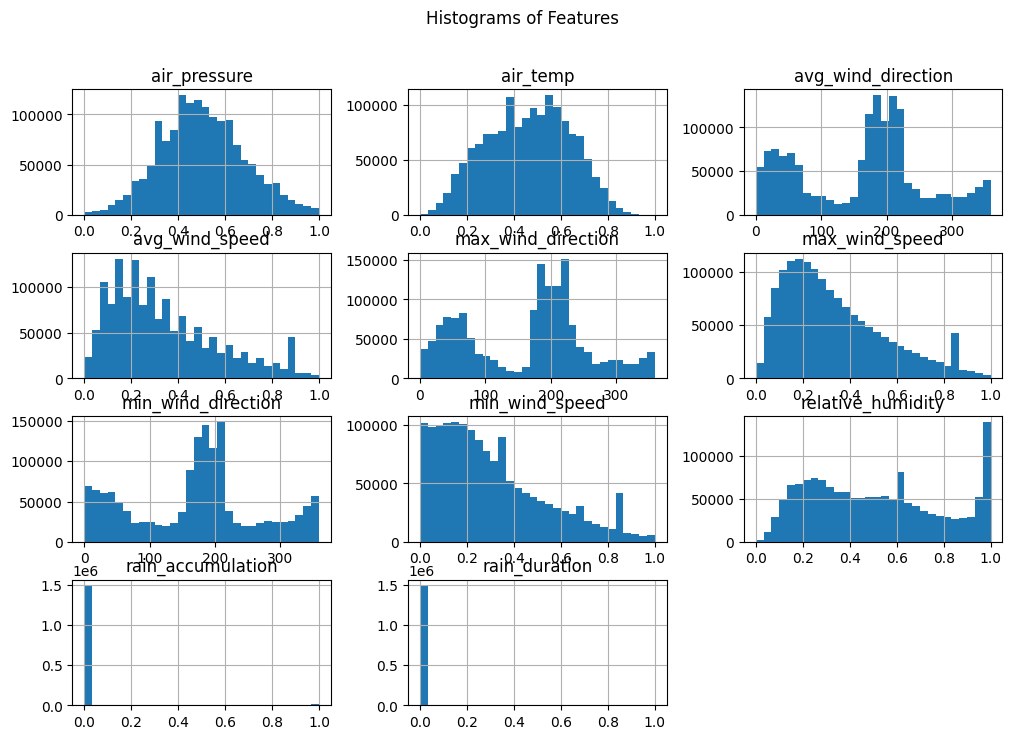

In [22]:
visualize.hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of Features")
plt.show()

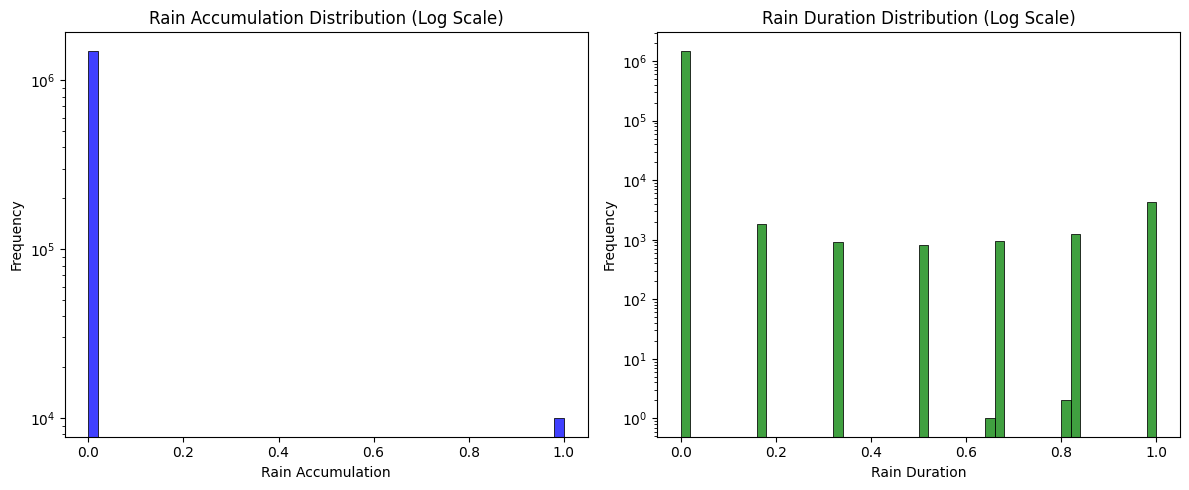

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Rain Accumulation Histogram
sns.histplot(df['rain_accumulation'], bins=50, ax=axes[0], color='blue')
axes[0].set_yscale('log')
axes[0].set_title("Rain Accumulation Distribution (Log Scale)")
axes[0].set_xlabel("Rain Accumulation")
axes[0].set_ylabel("Frequency")

# Rain Duration Histogram
sns.histplot(df['rain_duration'], bins=50, ax=axes[1], color='green')
axes[1].set_yscale('log')
axes[1].set_title("Rain Duration Distribution (Log Scale)")
axes[1].set_xlabel("Rain Duration")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

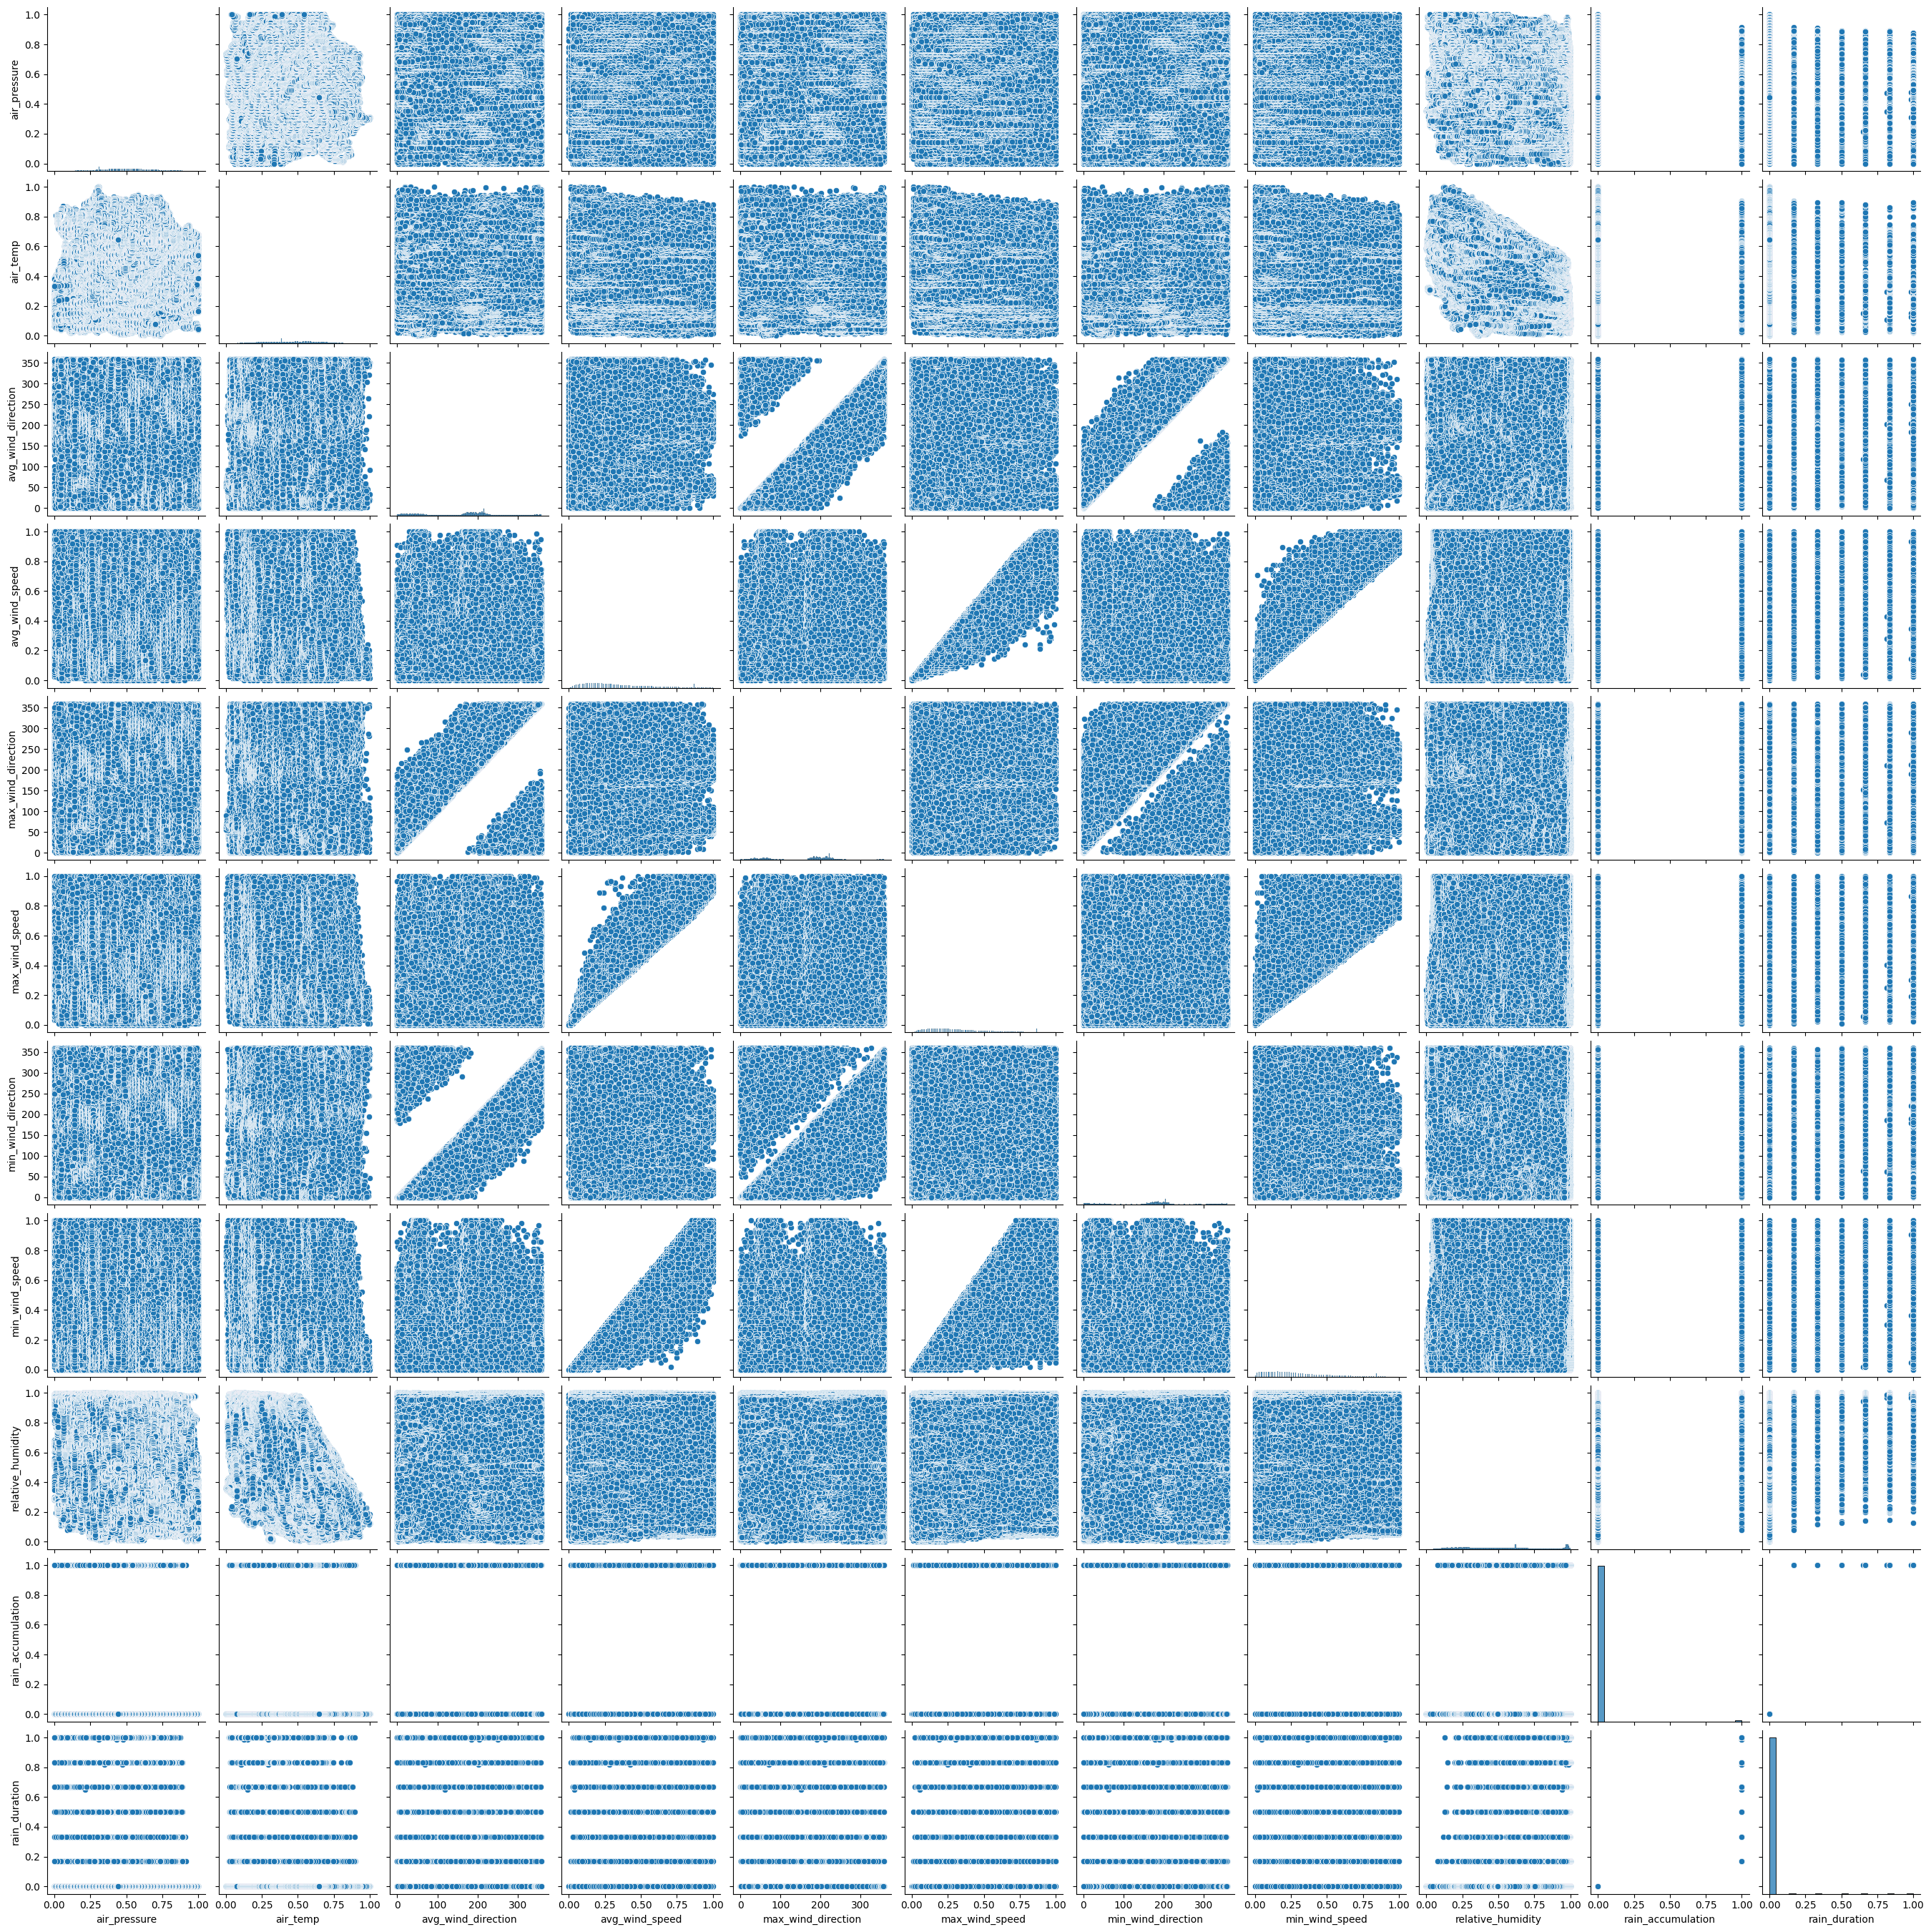

In [24]:
sns.pairplot(visualize)
plt.show()

### Feature Correlation Heatmap

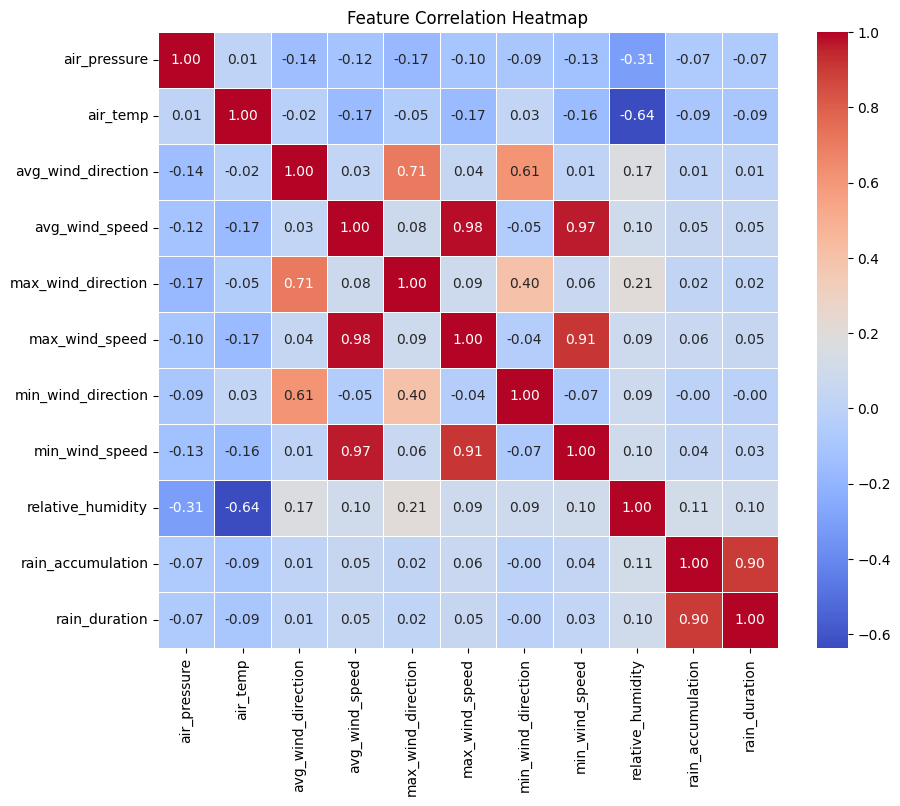

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(visualize.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## **Wind_Direction**

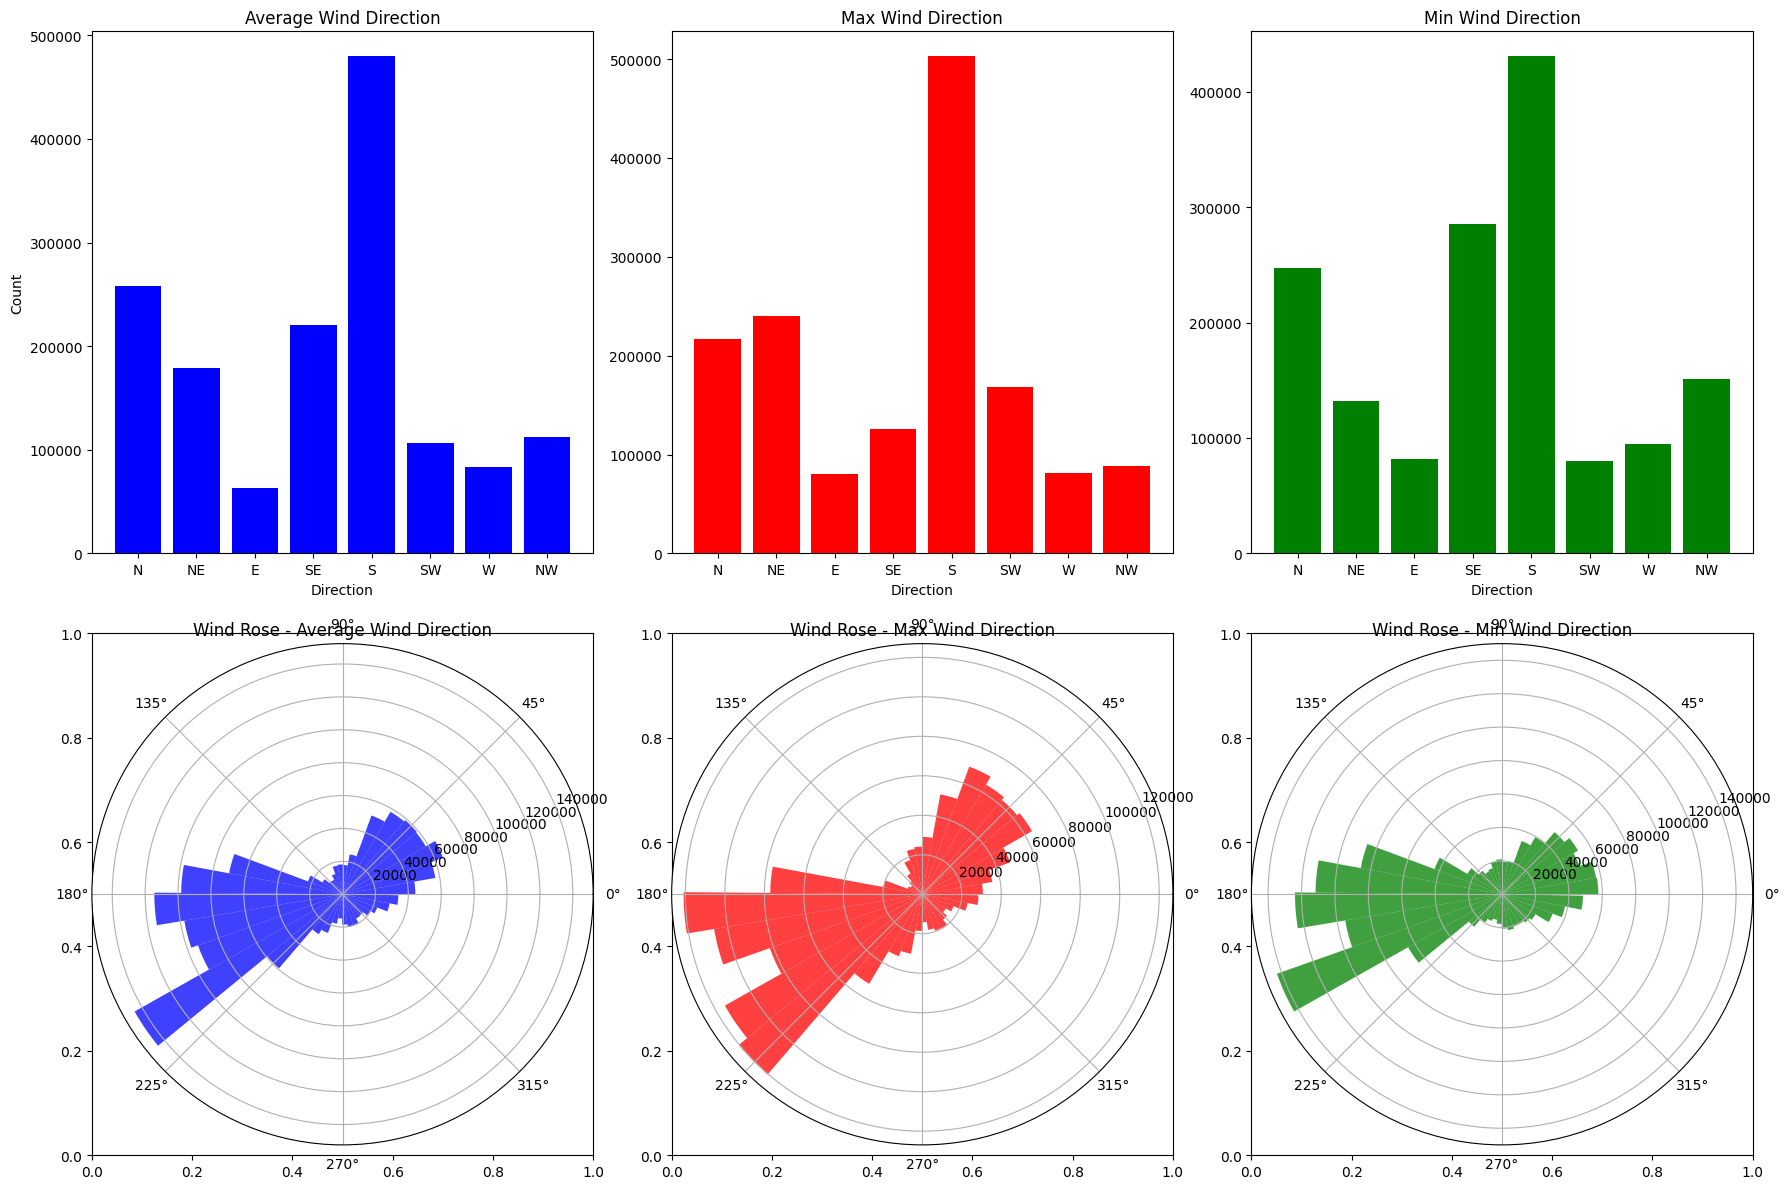

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to categorize wind direction into N, NE, E, SE, S, SW, W, NW
def categorize_wind_direction(degrees):
    bins = [0, 45, 90, 135, 180, 225, 270, 315, 360]  # Corrected bin edges
    labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
    return pd.cut(degrees % 360, bins=bins, labels=labels, include_lowest=True)

# Apply categorization
df['avg_wind_category'] = categorize_wind_direction(df['avg_wind_direction'])
df['max_wind_category'] = categorize_wind_direction(df['max_wind_direction'])
df['min_wind_category'] = categorize_wind_direction(df['min_wind_direction'])

# Count occurrences
avg_counts = df['avg_wind_category'].value_counts().reindex(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'], fill_value=0)
max_counts = df['max_wind_category'].value_counts().reindex(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'], fill_value=0)
min_counts = df['min_wind_category'].value_counts().reindex(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'], fill_value=0)

# Create figure with 2 rows (3 bar charts on top, 3 polar plots below)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Bar charts (Top Row)
axes[0, 0].bar(avg_counts.index, avg_counts.values, color='blue')
axes[0, 0].set_title("Average Wind Direction")
axes[0, 0].set_xlabel("Direction")
axes[0, 0].set_ylabel("Count")

axes[0, 1].bar(max_counts.index, max_counts.values, color='red')
axes[0, 1].set_title("Max Wind Direction")
axes[0, 1].set_xlabel("Direction")

axes[0, 2].bar(min_counts.index, min_counts.values, color='green')
axes[0, 2].set_title("Min Wind Direction")
axes[0, 2].set_xlabel("Direction")

# Polar plots (Bottom Row)
angles_avg = np.deg2rad(df['avg_wind_direction'])  # Convert to radians
angles_max = np.deg2rad(df['max_wind_direction'])
angles_min = np.deg2rad(df['min_wind_direction'])

# Average Wind Rose
ax1 = fig.add_subplot(2, 3, 4, projection='polar')
ax1.hist(angles_avg, bins=36, color='blue', alpha=0.75)
ax1.set_title("Wind Rose - Average Wind Direction")

# Max Wind Rose
ax2 = fig.add_subplot(2, 3, 5, projection='polar')
ax2.hist(angles_max, bins=36, color='red', alpha=0.75)
ax2.set_title("Wind Rose - Max Wind Direction")

# Min Wind Rose
ax3 = fig.add_subplot(2, 3, 6, projection='polar')
ax3.hist(angles_min, bins=36, color='green', alpha=0.75)
ax3.set_title("Wind Rose - Min Wind Direction")

# Adjust layout
plt.tight_layout()
plt.show()


#### Future Coding

#### For Wind_Direction

   rowID      full_timestamp  air_pressure  air_temp  avg_wind_speed  \
1      1 2011-09-10 00:01:49      0.212903  0.485095        0.106667   
2      2 2011-09-10 00:02:49      0.212903  0.490515        0.093333   
3      3 2011-09-10 00:03:49      0.212903  0.493225        0.160000   
4      4 2011-09-10 00:04:49      0.212903  0.493225        0.053333   
5      5 2011-09-10 00:05:49      0.212903  0.479675        0.333333   

   max_wind_speed  min_wind_speed  rain_accumulation  rain_duration  \
1        0.157303        0.031746                  0            0.0   
2        0.123596        0.047619                  0            0.0   
3        0.168539        0.111111                  0            0.0   
4        0.101124        0.015873                  0            0.0   
5        0.325843        0.317460                  0            0.0   

   relative_humidity  ...  timestamp  avg_wind_category  max_wind_category  \
1           0.424702  ...   00:01:49                 SE       

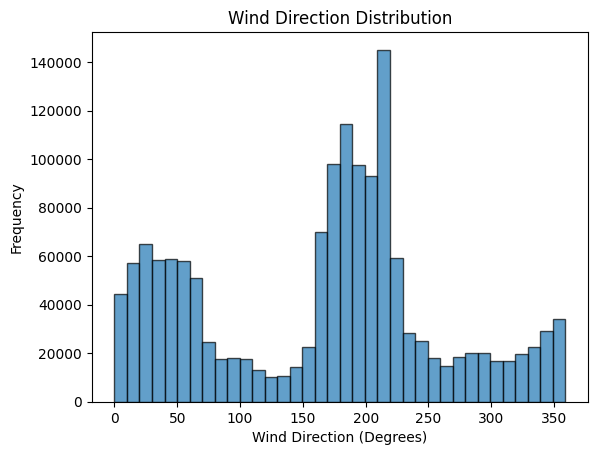

In [27]:
df_scaled = df.copy()

# Convert wind direction columns into x, y components
for col in ['avg_wind_direction', 'min_wind_direction', 'max_wind_direction']:
    df_scaled[f'{col}_x'] = np.cos(np.radians(df[col]))
    df_scaled[f'{col}_y'] = np.sin(np.radians(df[col]))

# Drop original wind direction columns
df_scaled.drop(columns=['avg_wind_direction', 'min_wind_direction', 'max_wind_direction'], inplace=True)

# Print the transformed dataset
print(df_scaled.head())


# Recover wind direction angles from x, y
df_scaled['avg_wind_direction_deg'] = np.degrees(np.arctan2(df_scaled['avg_wind_direction_y'], df_scaled['avg_wind_direction_x'])) % 360
df_scaled['min_wind_direction_deg'] = np.degrees(np.arctan2(df_scaled['min_wind_direction_y'], df_scaled['min_wind_direction_x'])) % 360
df_scaled['max_wind_direction_deg'] = np.degrees(np.arctan2(df_scaled['max_wind_direction_y'], df_scaled['max_wind_direction_x'])) % 360

# Print the first few values
print(df_scaled[['avg_wind_direction_deg', 'min_wind_direction_deg', 'max_wind_direction_deg']].head())


plt.hist(df_scaled['avg_wind_direction_deg'], bins=36, edgecolor='black', alpha=0.7)  # 10° bins
plt.xlabel("Wind Direction (Degrees)")
plt.ylabel("Frequency")
plt.title("Wind Direction Distribution")
plt.show()

## Modeling

1. Silhouette Score
- Ranges from -1 to 1
- Closer to 1 = well-separated clusters
- Close to 0 = overlapping clusters
- Negative = wrong clustering

2. Number of Clusters
- Too few clusters → underfitting (missing structure)
- Too many clusters → overfitting (fitting noise)

3. Cluster Size Distribution
- Overfitting: many tiny clusters
- Underfitting: one or two large blobs

4. Visual Inspection (PCA/t-SNE plots)
- If clusters look meaningful and distinct → good
- If everything overlaps or looks noisy → under/overfit

### Example: Overfitting in K-Means
If k = 20 gives:
- Silhouette = 0.2
- Several clusters with <1% of data → You’re likely overfitting

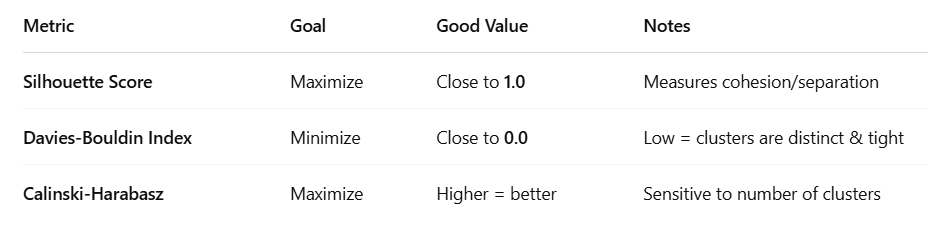

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist

In [29]:
# Select only necessary features including scaled ones and directional components
features = [
    'air_pressure', 'air_temp', 'avg_wind_speed', 'max_wind_speed',
    'min_wind_speed', 'rain_duration', 'relative_humidity',
    'avg_wind_direction_x', 'avg_wind_direction_y',
    'min_wind_direction_x', 'min_wind_direction_y',
    'max_wind_direction_x', 'max_wind_direction_y'
]
df = df_scaled[features].dropna()

df_sample = df_scaled[features].sample(n=10000, random_state=42)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Function to evaluate clustering results
def evaluate_model(X, labels, name):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters < 2:
        return (name, n_clusters, -1, -1, -1)
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    return (name, n_clusters, sil, db, ch)

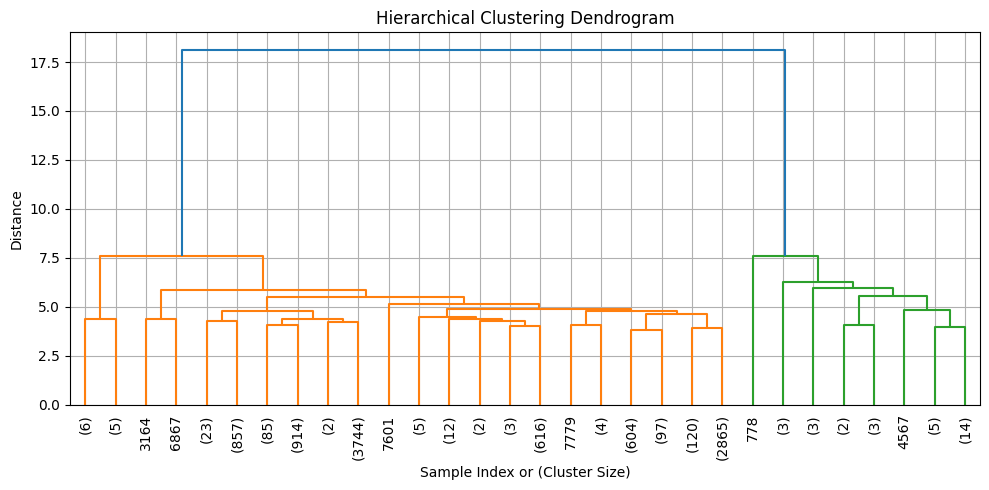

In [30]:
# Default parameters
# Clustering - KMeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
labels_kmeans = kmeans.labels_

# Clustering - DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
labels_dbscan = dbscan.labels_

# Clustering - Hierarchical
hierarchical = AgglomerativeClustering(n_clusters=4).fit(X_scaled)
labels_hierarchical = hierarchical.labels_

# Visualize Dendrogram
linkage_matrix = linkage(X_scaled, method='average')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.tight_layout()
plt.grid(True)
plt.show()

# Evaluate each model
results = [
    evaluate_model(X_scaled, labels_kmeans, "KMeans"),
    evaluate_model(X_scaled, labels_dbscan, "DBSCAN"),
    evaluate_model(X_scaled, labels_hierarchical, "Hierarchical")
]

# Create DataFrame of results
results_df = pd.DataFrame(results, columns=["Model", "Num Clusters", "Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Index"])
results_df.sort_values(by="Silhouette Score", ascending=False, inplace=True)

# Visualize clusters (PCA)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='tab10')
axs[0].set_title('K-Means Clustering')

axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan.labels_, cmap='tab10')
axs[1].set_title('DBSCAN Clustering')

axs[2].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical.labels_, cmap='tab10')
axs[2].set_title('Hierarchical Clustering')

plt.tight_layout()
plt.show()

# Display results
results_df

## Tune and find best parameters

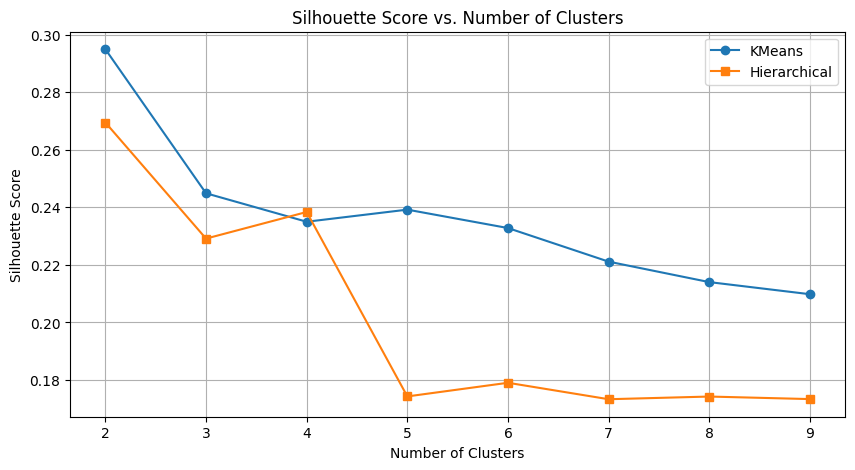

eps  min_samples  n_clusters  silhouette_score
19  1.1           10           3         -0.062004
16  1.0           10           3         -0.117350
17  1.0           15           4         -0.125713
2   0.5           10           4         -0.157465
18  1.1            5           5         -0.186205
14  0.9           15           7         -0.191176
10  0.8           10          15         -0.250413
11  0.8           15          14         -0.266387
15  1.0            5          10         -0.278068
13  0.9           10           7         -0.294612

In [37]:
### 1. Tune KMeans & Hierarchical over a range of k
k_range = range(2, 10)
sil_kmeans = []
sil_hierarchical = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    km_score = silhouette_score(X_scaled, km.labels_)
    sil_kmeans.append(km_score)

    hc = AgglomerativeClustering(n_clusters=k).fit(X_scaled)
    hc_score = silhouette_score(X_scaled, hc.labels_)
    sil_hierarchical.append(hc_score)

# Plot Silhouette Scores for KMeans and Hierarchical
plt.figure(figsize=(10, 5))
plt.plot(k_range, sil_kmeans, marker='o', label='KMeans')
plt.plot(k_range, sil_hierarchical, marker='s', label='Hierarchical')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)
plt.show()


### 2. Tune DBSCAN over a range of eps and min_samples
eps_values = np.linspace(0.2, 1.1, 10)
min_samples_values = [5, 10, 15]
dbscan_results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = db.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters >= 2:
            sil = silhouette_score(X_scaled, labels)
            dbscan_results.append((eps, min_samples, n_clusters, sil))

# Convert to DataFrame and show top results
dbscan_df = pd.DataFrame(dbscan_results, columns=["eps", "min_samples", "n_clusters", "silhouette_score"])
dbscan_df.sort_values(by="silhouette_score", ascending=False).head(10)

## Try using different parameters

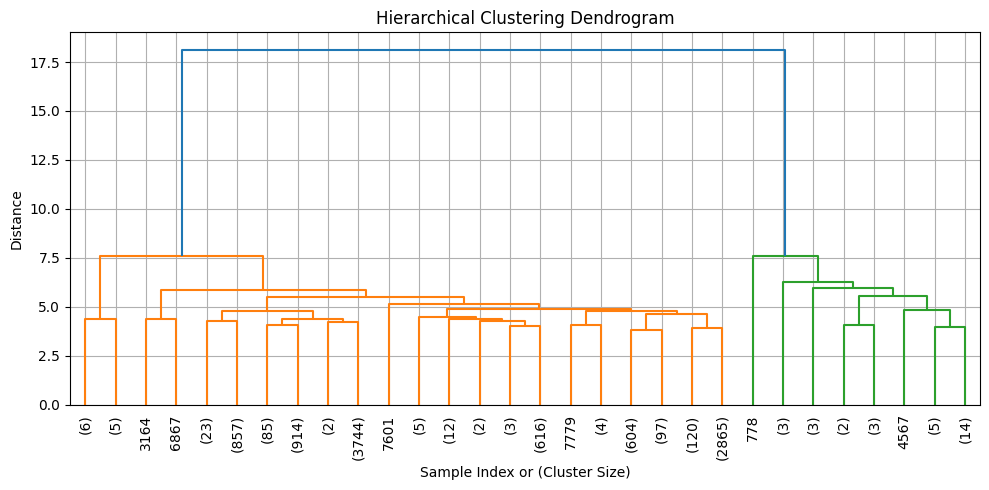

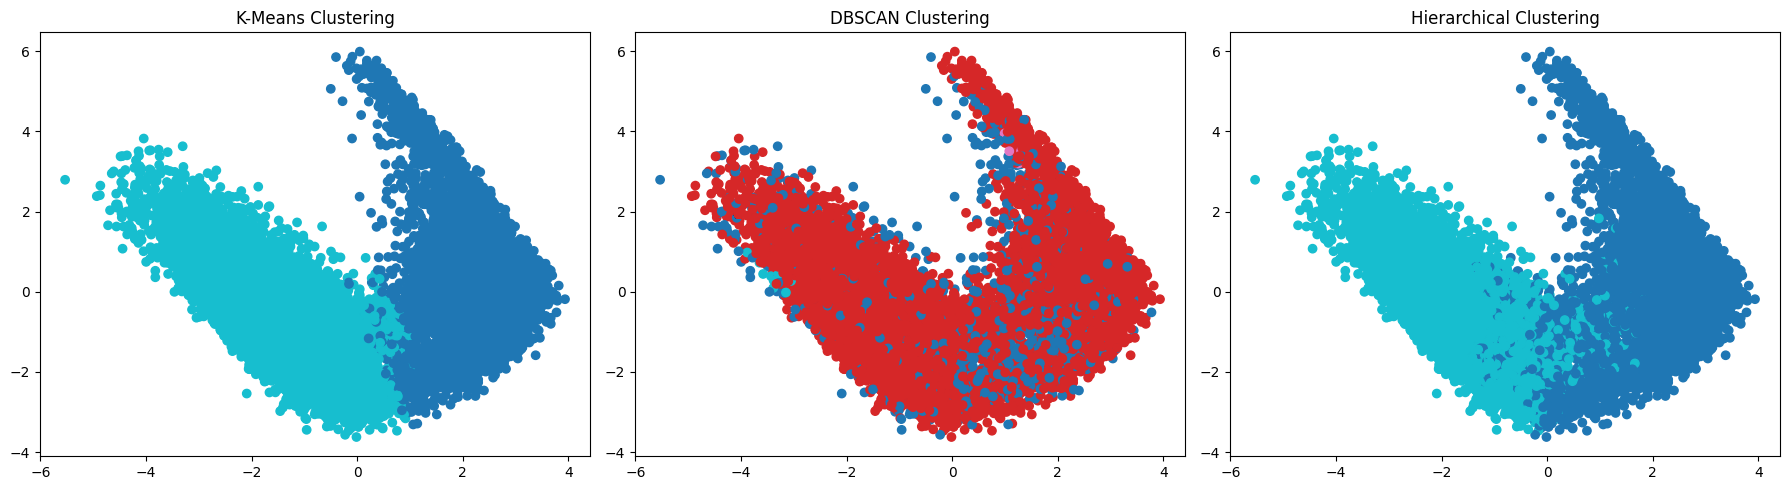

Model  Num Clusters  Silhouette Score  Davies-Bouldin Index  \
0        KMeans             2          0.295000              1.445105   
2  Hierarchical             2          0.269515              1.555399   
1        DBSCAN             3         -0.062004              4.202970   

   Calinski-Harabasz Index  
0              3930.254214  
2              3477.289160  
1                35.219333

In [33]:
# Best Result
# Use the parameters got after tuning
# Clustering - KMeans(k=2)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
labels_kmeans = kmeans.labels_

# Clustering - DBSCAN(eps=1.0, min_samples=10)
dbscan = DBSCAN(eps=1.1, min_samples=10).fit(X_scaled)
labels_dbscan = dbscan.labels_

# Clustering - Hierarchical(k=2)
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X_scaled)
labels_hierarchical = hierarchical.labels_

# Visualize Dendrogram
linkage_matrix = linkage(X_scaled, method='average')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.tight_layout()
plt.grid(True)
plt.show()

# Evaluate each model
results = [
    evaluate_model(X_scaled, labels_kmeans, "KMeans"),
    evaluate_model(X_scaled, labels_dbscan, "DBSCAN"),
    evaluate_model(X_scaled, labels_hierarchical, "Hierarchical")
]

# Create DataFrame of results
results_df = pd.DataFrame(results, columns=["Model", "Num Clusters", "Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Index"])
results_df.sort_values(by="Silhouette Score", ascending=False, inplace=True)

# Visualize clusters (PCA)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='tab10')
axs[0].set_title('K-Means Clustering')

axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan.labels_, cmap='tab10')
axs[1].set_title('DBSCAN Clustering')

axs[2].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical.labels_, cmap='tab10')
axs[2].set_title('Hierarchical Clustering')

plt.tight_layout()
plt.show()

# Display results
results_df

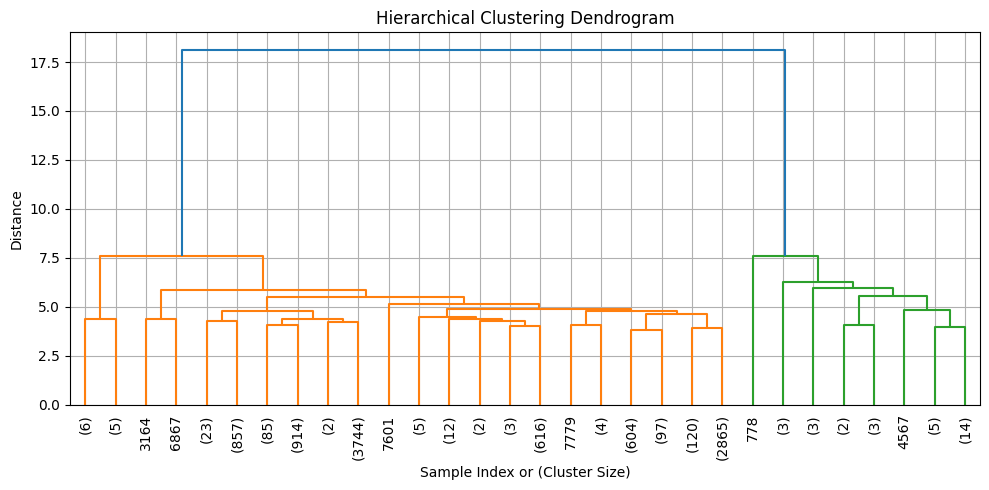

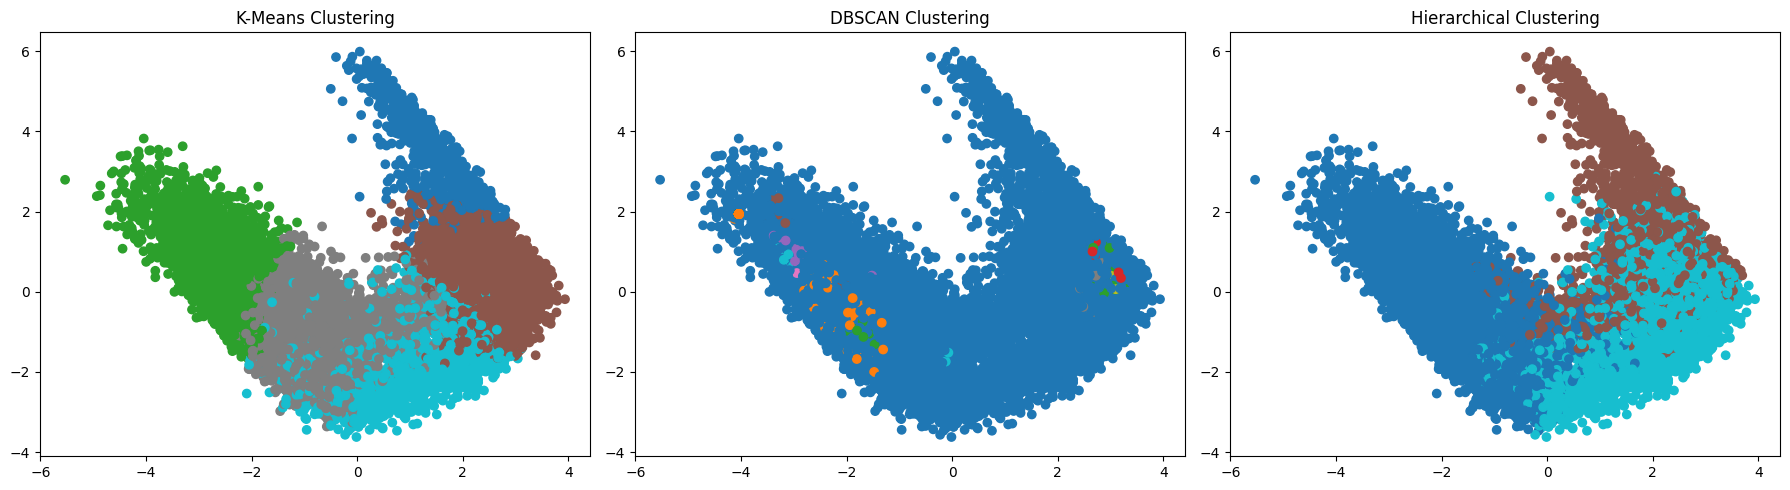

Model  Num Clusters  Silhouette Score  Davies-Bouldin Index  \
0        KMeans             5          0.239214              1.358264   
1        DBSCAN            17         -0.449245              1.362836   
2  Hierarchical             3          0.229143              1.655923   

   Calinski-Harabasz Index  
0              2654.380443  
1                45.758879  
2              2585.012602

In [34]:
# Clustering - KMeans(k=4)
kmeans2 = KMeans(n_clusters=5, random_state=42).fit(X_scaled)
labels_kmeans2 = kmeans2.labels_

# Clustering - DBSCAN(eps=1.5, min_samples=10)
dbscan2 = DBSCAN(eps=0.6, min_samples=10).fit(X_scaled)
labels_dbscan2 = dbscan2.labels_

# Clustering - Hierarchical(k=2)
hierarchical2 = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_scaled)
labels_hierarchical2 = hierarchical2.labels_

# Visualize Dendrogram
linkage_matrix = linkage(X_scaled, method='average')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.tight_layout()
plt.grid(True)
plt.show()

# Evaluate each model
results = [
    evaluate_model(X_scaled, labels_kmeans2, "KMeans"),
    evaluate_model(X_scaled, labels_dbscan2, "DBSCAN"),
    evaluate_model(X_scaled, labels_hierarchical2, "Hierarchical")
]

# Create DataFrame of results
results_df2 = pd.DataFrame(results, columns=["Model", "Num Clusters", "Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Index"])
results_df.sort_values(by="Silhouette Score", ascending=False, inplace=True)

# Visualize clusters (PCA)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans2, cmap='tab10')
axs[0].set_title('K-Means Clustering')

axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan2, cmap='tab10')
axs[1].set_title('DBSCAN Clustering')

axs[2].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hierarchical2, cmap='tab10')
axs[2].set_title('Hierarchical Clustering')

plt.tight_layout()
plt.show()

# Display results
results_df2

In [35]:
# Interpret the Clusters
kmeans_centers = kmeans.cluster_centers_
kmeans_cluster_analysis = pd.DataFrame(kmeans_centers, columns=features)
print("\nKMeans Cluster Centers Analysis:")
print(kmeans_cluster_analysis)


KMeans Cluster Centers Analysis:
   air_pressure  air_temp  avg_wind_speed  max_wind_speed  min_wind_speed  \
0      0.340800  0.144431       -0.320335       -0.300693       -0.321389   
1     -0.256885 -0.108868        0.241459        0.226654        0.242253   

   rain_duration  relative_humidity  avg_wind_direction_x  \
0      -0.039692          -0.384283              1.006244   
1       0.029918           0.289661             -0.758477   

   avg_wind_direction_y  min_wind_direction_x  min_wind_direction_y  \
0              0.703633              1.046446              0.313034   
1             -0.530378             -0.788780             -0.235956   

   max_wind_direction_x  max_wind_direction_y  
0              0.856974              0.921398  
1             -0.645962             -0.694522  


Based on the KMeans Cluster Centers Analysis, let's qualitatively describe each cluster:

###**Cluster 0:**
*   Air Pressure: High air pressure (+0.34).
*   Temperature: Slightly higher than average (+0.14).
*   Wind Speed: Generally low average wind speed (-0.32) and low maximum wind speed (-0.30).
*   Rain Duration: Low or short periods of rain (-0.04).
*   Relative Humidity: Low relative humidity (-0.38), indicating drier conditions.
*   Wind Direction: Strong positive component in the x-axis of the wind direction (+1.01), meaning winds primarily come from the east or southeast.
*   Description: This cluster could represent steady, mild winds in areas with stable weather conditions and low moisture. The wind likely flows in a predominantly consistent direction but with low speeds, ideal for areas where ventilation or cooling is needed but not excessive force.
*   Qualitative description: "Moderate, steady winds with lower variability".

###**Cluster 1:**
*   Air Pressure: Lower air pressure (-0.26).
*   Temperature: Slightly cooler than average (-0.11).
*   Wind Speed: Moderate wind speeds (+0.24 for average and +0.23 for max wind speeds), indicating stronger winds compared to Cluster 0.
*   Rain Duration: Longer rain durations (+0.03), suggesting this cluster experiences more rainfall or longer rainfall periods.
*   Relative Humidity: Higher relative humidity (+0.29), indicating slightly more moisture in the air.
*   Wind Direction: Strong negative components in the x-axis of wind direction (-0.76), suggesting winds primarily come from the west or northwest.
*   Description: This cluster is associated with stronger, more variable winds, likely from changing weather patterns or different wind zones. The winds are more unpredictable, likely in areas affected by changing or turbulent weather conditions, with occasional rainstorms. This would be more suitable for regions needing wind energy generation or increased natural ventilation in buildings.
*   Qualitative description: "Stronger, more erratic winds".

###**Summary**
* Cluster 0 represents areas with low wind speed and dry, stable conditions with moderate airflow from the southeast.

* Cluster 1 represents regions with stronger winds and more humid, rainy conditions, likely with winds from the northwest.

* These clusters can provide insights into how urban design could be adjusted to improve ventilation or mitigate heat islands, depending on which type of wind pattern dominates different city areas.